### Generating a Time x Threads Graph for SVT-AV1, EVC and VVENC

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

csv_path = "~/VC/tests/csv/threads.csv"
p = str(Path('~').expanduser()) 
csv_path = csv_path.replace('~', p)

df = pd.read_csv(csv_path)
df

,codec,sequence,threads,total time,qp
0,svt,bowing,1,2.648,32
1,svt,bowing,2,1.170,32
2,svt,bowing,4,0.838,32
3,svt,bowing,8,0.482,32
4,evc,bowing,1,12.267,32
5,evc,bowing,2,12.195,32
6,evc,bowing,4,12.228,32
7,evc,bowing,8,12.313,32
8,vvcodec,bowing,1,6.713,32
9,vvcodec,bowing,2,6.907,32


In [19]:
svt_r = df.loc[df["codec"] == "svt"]
evc_r = df.loc[df["codec"] == "evc"]
vvcodec_r = df.loc[df["codec"] == "vvcodec"]
svt_r

,codec,sequence,threads,total time,qp
0,svt,bowing,1,2.648,32
1,svt,bowing,2,1.170,32
2,svt,bowing,4,0.838,32
3,svt,bowing,8,0.482,32


ValueError: Wrong number of dimensions. values.ndim > ndim [2 > 1]

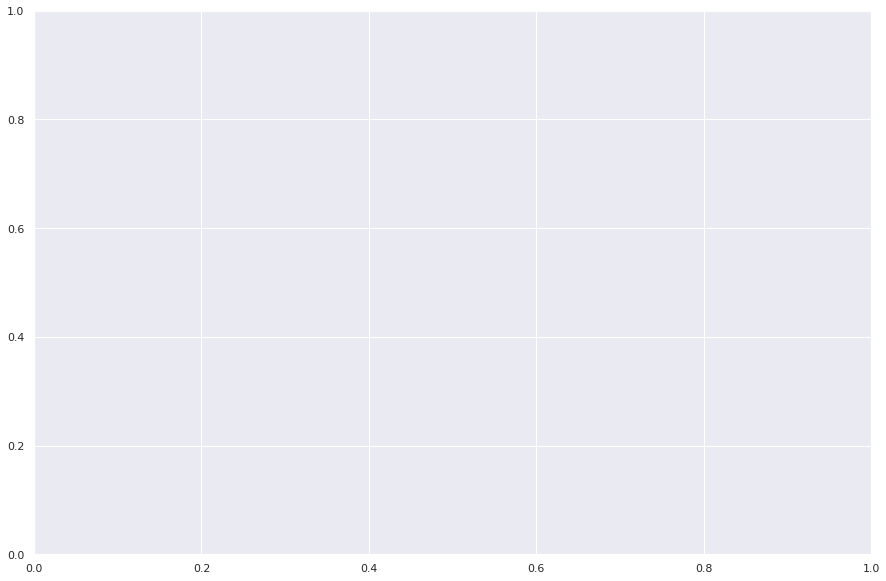

In [51]:
# for i in range(4):
#     plt.boxplot(x=svt_r['threads'].iloc[[i]])
#     plt.boxplot(x=evc_r['threads'].iloc[[i]])
#     plt.boxplot(x=vvcodec_r['threads'].iloc[[i]])

fig, ax = plt.subplots(1)

box = sns.boxplot(
    data=[svt_r['total time'].iloc[[list(range(4))]], evc_r['total time'].iloc[[list(range(4))]],
                vvcodec_r['total time'].iloc[[list(range(4))]]],
    ax=ax[0],
    palette=[sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["medium blue"]],
    showmeans=True,
)

sns.set(rc={"figure.figsize":(15, 10)})
box.set_xticks(range(4))
box.set_xticklabels([2**i for i in range(4)])
plt.xlabel("Threads")
plt.ylabel("Time (seconds)")

print(svt_r['total time'].iloc[list(range(4))])
print(svt_r.iloc[list(range(4))])